# Part4 figures

In this notebook we generate Fig. 1D, 4B & 6F using the annotated single-cell transcriptome data.

In [2]:
import os,sys
import scanpy as sc
import pandas as pd
import numpy as np
import scipy as sp
import anndata
import itertools
import functools
from time import time
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import Counter
import multiprocessing
import mm_functions_14_10_2020 as mm

In [4]:
# Set figure parameters 
mylines = 0.15*2.82 # the number 2.82 is the difference
					# between Illustrator 1 pt and python 1 pt.
mpl.rcParams['axes.linewidth'] = mylines # default 1
mpl.rcParams['ytick.direction'] = 'out' # default 'in'
mpl.rcParams['xtick.direction'] = 'out' # default 'in'
mpl.rcParams['xtick.major.size'] = 2 # default 4
mpl.rcParams['ytick.major.size'] = 2 # default 4
mpl.rcParams['xtick.major.width'] = mylines # default 0.5
mpl.rcParams['ytick.major.width'] = mylines # default 0.5
mpl.rcParams['grid.linewidth'] = mylines/1.5 # default 0.5
mpl.rcParams['grid.color'] = '0.8' # default 'k'
mpl.rcParams['grid.linestyle'] = 'solid'# default ':'
mpl.rcParams['legend.frameon'] = False # default True
mpl.rcParams['figure.dpi']= 300
mpl.rc("savefig", dpi=300)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

## Load allntova adata & plot Fig. 1A

In [77]:
# Reload adatas into dict  
adata = sc.read_h5ad('backups/adata_allntova_05302020.h5ad')
adata.shape

(8757, 20679)

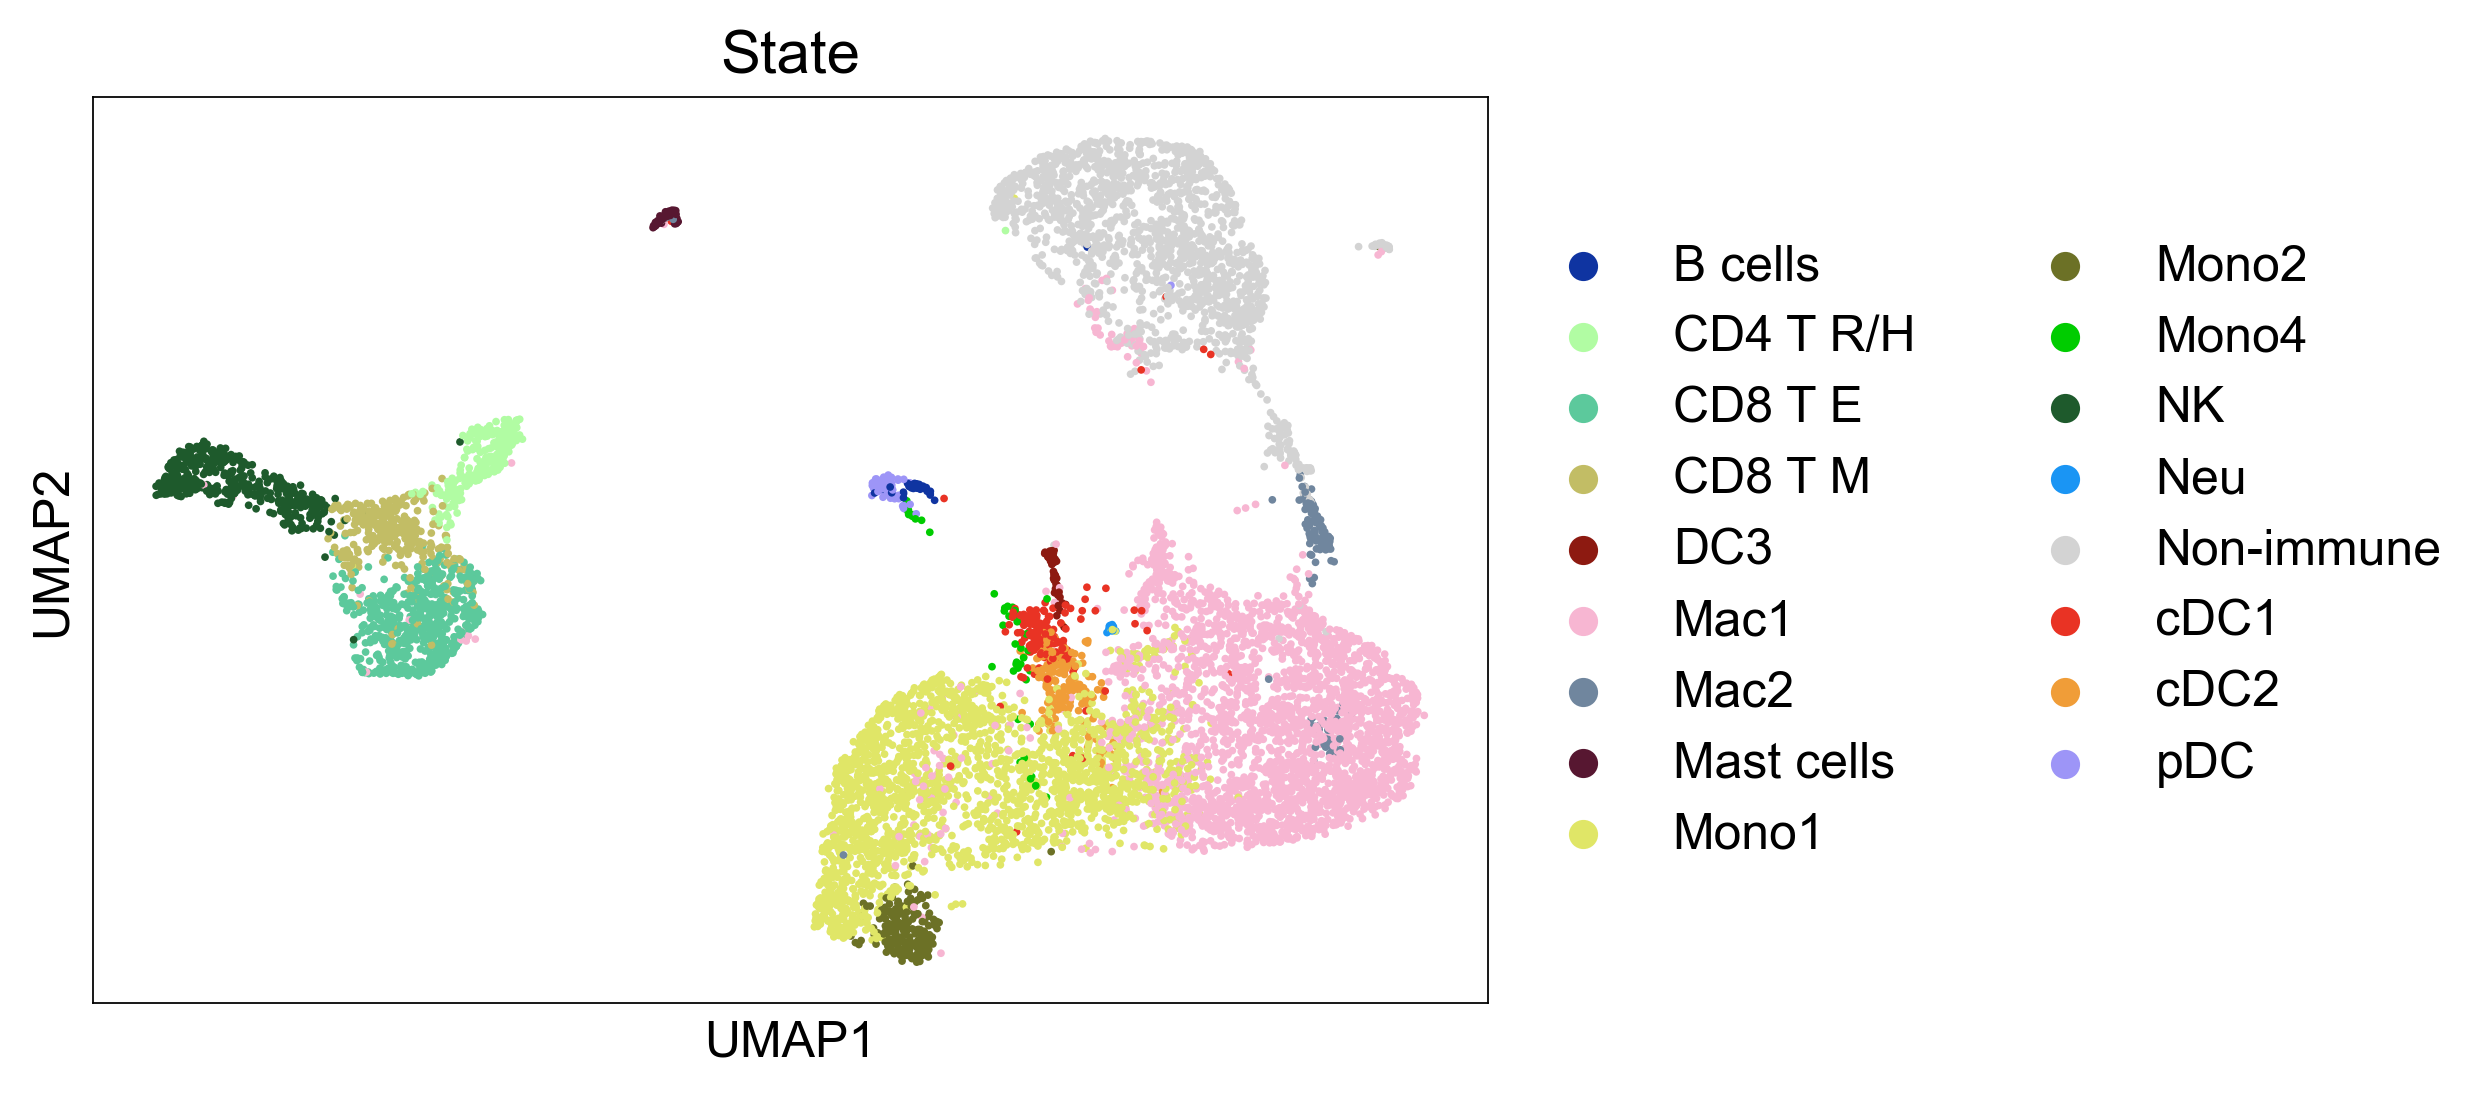

In [41]:
# Check the umap 
sc.pl.umap(adata, color = 'State')

## Create outlier gene gmask

In [16]:
# Genes have to be expressed at 100 TPM to be included 
gmask = mm.gmask_outlier_genes(adata, min_counts = 1*adata.X.sum(1).mean()/1e4, min_cells = 4)

18183 genes are expressed in at least 4 cells with at least more than 0.10588819580078125 counts per cell



## Fig. 1D

In [17]:
chemokine_receptors = pd.read_csv('./chemokine_receptors_heatmap.csv')
chemokine_receptors

,chemokine_receptors
0,Ccr1
1,Ccr10
2,Ccr2
3,Ccr3
4,Ccr4
5,Ccr5
6,Ccr6
7,Ccr7
8,Ccr8
9,Ccr9


In [18]:
chemokine_receptors_filt = [receptor for receptor in chemokine_receptors['chemokine_receptors'].values if receptor in adata[:, gmask].var_names]

In [19]:
chemokine_receptors_filt

['Ccr1',
 'Ccr2',
 'Ccr5',
 'Ccr7',
 'Ccr9',
 'Cx3cr1',
 'Cxcr2',
 'Cxcr3',
 'Cxcr4',
 'Cxcr5',
 'Cxcr6',
 'Xcr1']

In [20]:
chemokine_receptors_exp = mm.adata_centroids('State', adata[:, chemokine_receptors_filt])

In [21]:
chemokine_receptors_exp.idxmax()

Ccr1            Neu
Ccr2          Mono1
Ccr5           Mac1
Ccr7            DC3
Ccr9            pDC
Cx3cr1         Mac2
Cxcr2           Neu
Cxcr3     CD4 T R/H
Cxcr4           Neu
Cxcr5       B cells
Cxcr6       CD8 T E
Xcr1           cDC1
dtype: object

In [22]:
heat = chemokine_receptors_exp + adata.X.sum(1).mean()/1e4
heat = heat/heat.median(0)
heat = np.log2(heat).T
print(heat.min().min())
print(heat.max().max())

-1.9242524
5.4215665


In [23]:
heat = heat.sort_values('CD8 T E', ascending = False)

In [24]:
col_order = ['CD8 T E', 'CD8 T M', 'CD4 T R/H', 'NK', 'B cells', 'Mast cells', 'cDC1', 'cDC2', 'DC3', 
             'pDC', 'Mono1', 'Mono2', 'Mono4', 'Neu', 'Mac1','Mac2', 'Non-immune']

In [25]:
heat = heat.loc[:, col_order]

AttributeError: 'Styler' object has no attribute 'to_html'

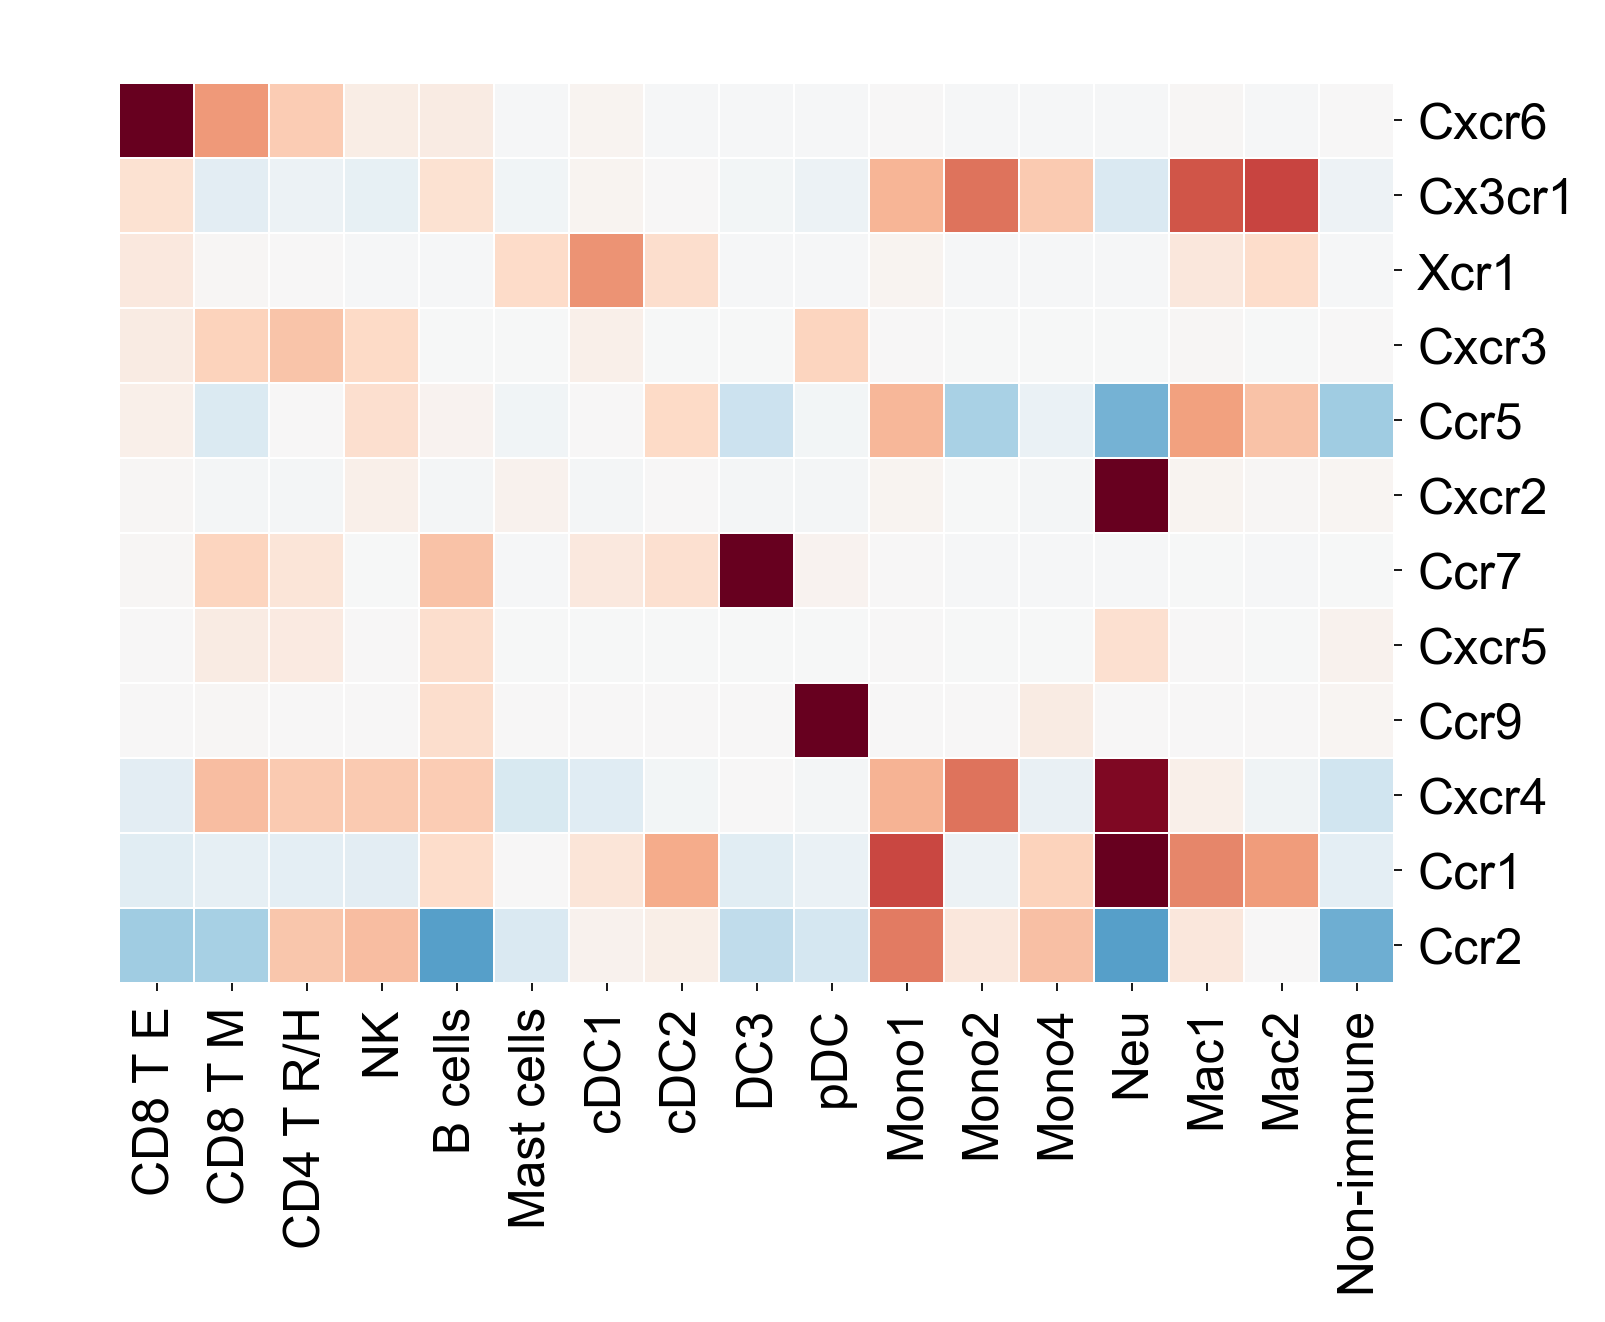

In [26]:
ax = mm.fixedWidthClusterMap(heat, row_cluster = False, col_cluster = False, cmap = plt.cm.get_cmap('RdBu_r'), 
                          linewidths = .25, cbar_pos = None, cellSizePixels=75, vmin = -3.5, vmax = 3.5)

mm.color_dataframe_cells(heat, vmin = -3.5, vmax = 3.5).to_excel('./outputs/gene_expression_heatmaps/heatmap_chemokine_receptors.xlsx')
ax.savefig('./outputs/gene_expression_heatmaps/heatmap_chemokine_receptors.pdf', dpi = 400)

## Fig. 4B

In [860]:
chemokines = pd.read_csv('./chemokines_heatmap.csv')
chemokines 

,chemokines
0,Ccl1
1,Ccl11
2,Ccl17
3,Ccl19
4,Ccl2
5,Ccl20
6,Ccl21a
7,Ccl21b
8,Ccl21c
9,Ccl22


In [861]:
chemokines.values.flatten()

array(['Ccl1', 'Ccl11', 'Ccl17', 'Ccl19', 'Ccl2', 'Ccl20', 'Ccl21a',
       'Ccl21b', 'Ccl21c', 'Ccl22', 'Ccl24', 'Ccl25', 'Ccl26', 'Ccl27a',
       'Ccl27b', 'Ccl28', 'Ccl3', 'Ccl4', 'Ccl5', 'Ccl6', 'Ccl7', 'Ccl8',
       'Ccl9', 'Cx3cl1', 'Cxcl1', 'Cxcl10', 'Cxcl11', 'Cxcl12', 'Cxcl13',
       'Cxcl14', 'Cxcl15', 'Cxcl16', 'Cxcl17', 'Cxcl2', 'Cxcl5', 'Cxcl9',
       'Gm1960', 'Lix', 'Pf4', 'Ppbp', 'Xcl1', 'Ccl12', 'Ccl13', 'Ccl14',
       'Ccl15', 'Ccl16', 'Ccl18'], dtype=object)

In [862]:
chemokine_filt = [chemokine for chemokine in chemokines.values.flatten() if chemokine in adata[:, gmask].var_names]

In [863]:
chemokine_exp = mm.centroids('State', adata[:, chemokine_filt])

In [864]:
heat = chemokine_exp + adata.X.sum(1).mean()/1e4
heat = heat/heat.median(0)
heat = np.log2(heat).T
print(heat.min().min())
print(heat.max().max())

-1.8271526
6.266825


In [865]:
heat = heat.sort_values('DC3', ascending = False)

In [866]:
apc_order = ['DC3', 'cDC1', 'cDC2', 'pDC', 'Mono1', 'Mono2', 'Mono4', 'Mac1', 'Mac2', 
             'CD8 T M', 'CD8 T E', 'CD4 T R/H', 'NK', 'B cells', 'Mast cells', 'Non-immune'
            ]

In [867]:
heat = heat.loc[:, apc_order]

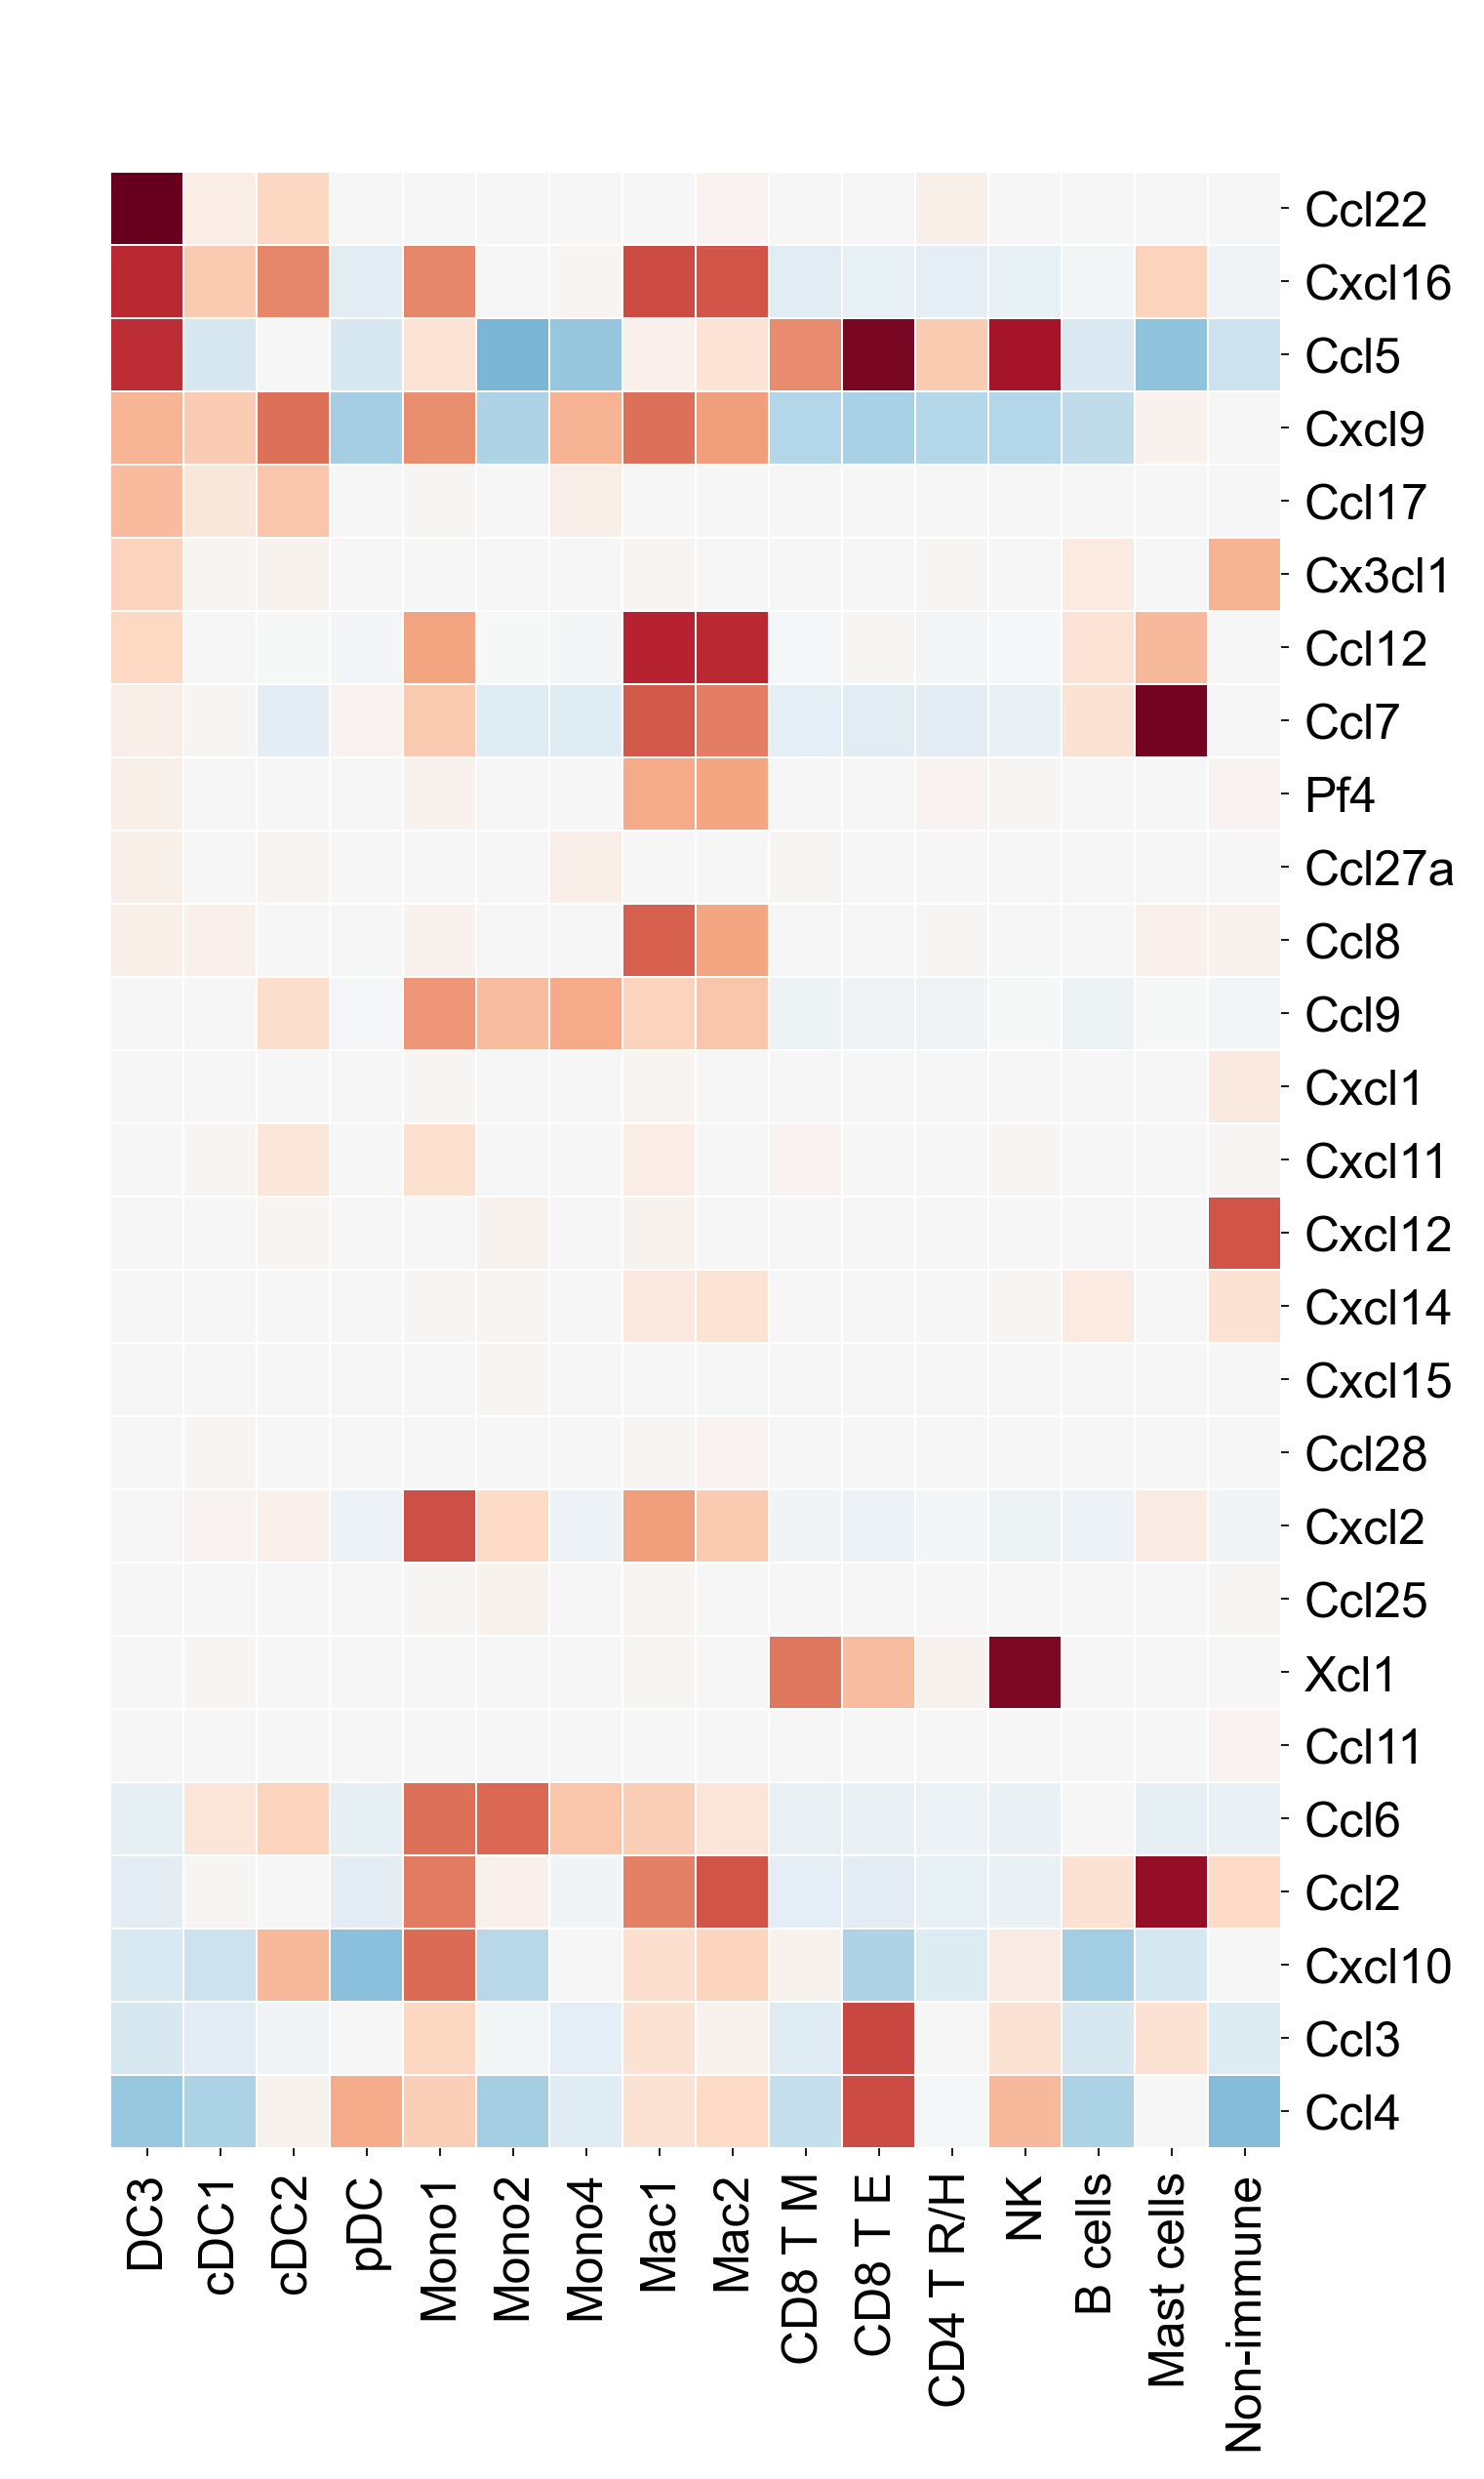

In [868]:
ax = mm.fixedWidthClusterMap(heat, row_cluster = False, col_cluster = False, cmap = plt.cm.get_cmap('RdBu_r'), 
                          linewidths = .25, cbar_pos = None, cellSizePixels=75, vmin = -4, vmax = 4)

mm.color_dataframe_cells(heat, vmin = -4, vmax = 4).to_excel('./outputs/gene_expression_heatmaps/heatmap_chemokines.xlsx')
ax.savefig('./outputs/gene_expression_heatmaps/heatmap_chemokines.pdf', dpi = 400)

## Fig. 6F

In [869]:
dc_cytokine_ligands = pd.read_csv('apc-b7-tnfsf-mhc-cytokine.csv', header = None).values.flatten()
dc_cytokine_ligands_filt = [gene for gene in dc_cytokine_ligands if gene in adata[:, gmask].var_names]
dc_cytokine_ligands_exp = mm.centroids('State', adata[:, dc_cytokine_ligands_filt])

In [870]:
heat = dc_cytokine_ligands_exp + adata.X.sum(1).mean()/1e4
heat = heat/heat.median(0)
heat = np.log2(heat).T
print(heat.min().min())
print(heat.max().max())

-4.459451
2.6938384


In [871]:
apc_order = ['DC3', 'cDC1', 'cDC2', 'pDC', 'Mono1', 'Mono2', 'Mono4', 'Mac1', 'Mac2']

In [872]:
heat = heat.loc[:, apc_order]

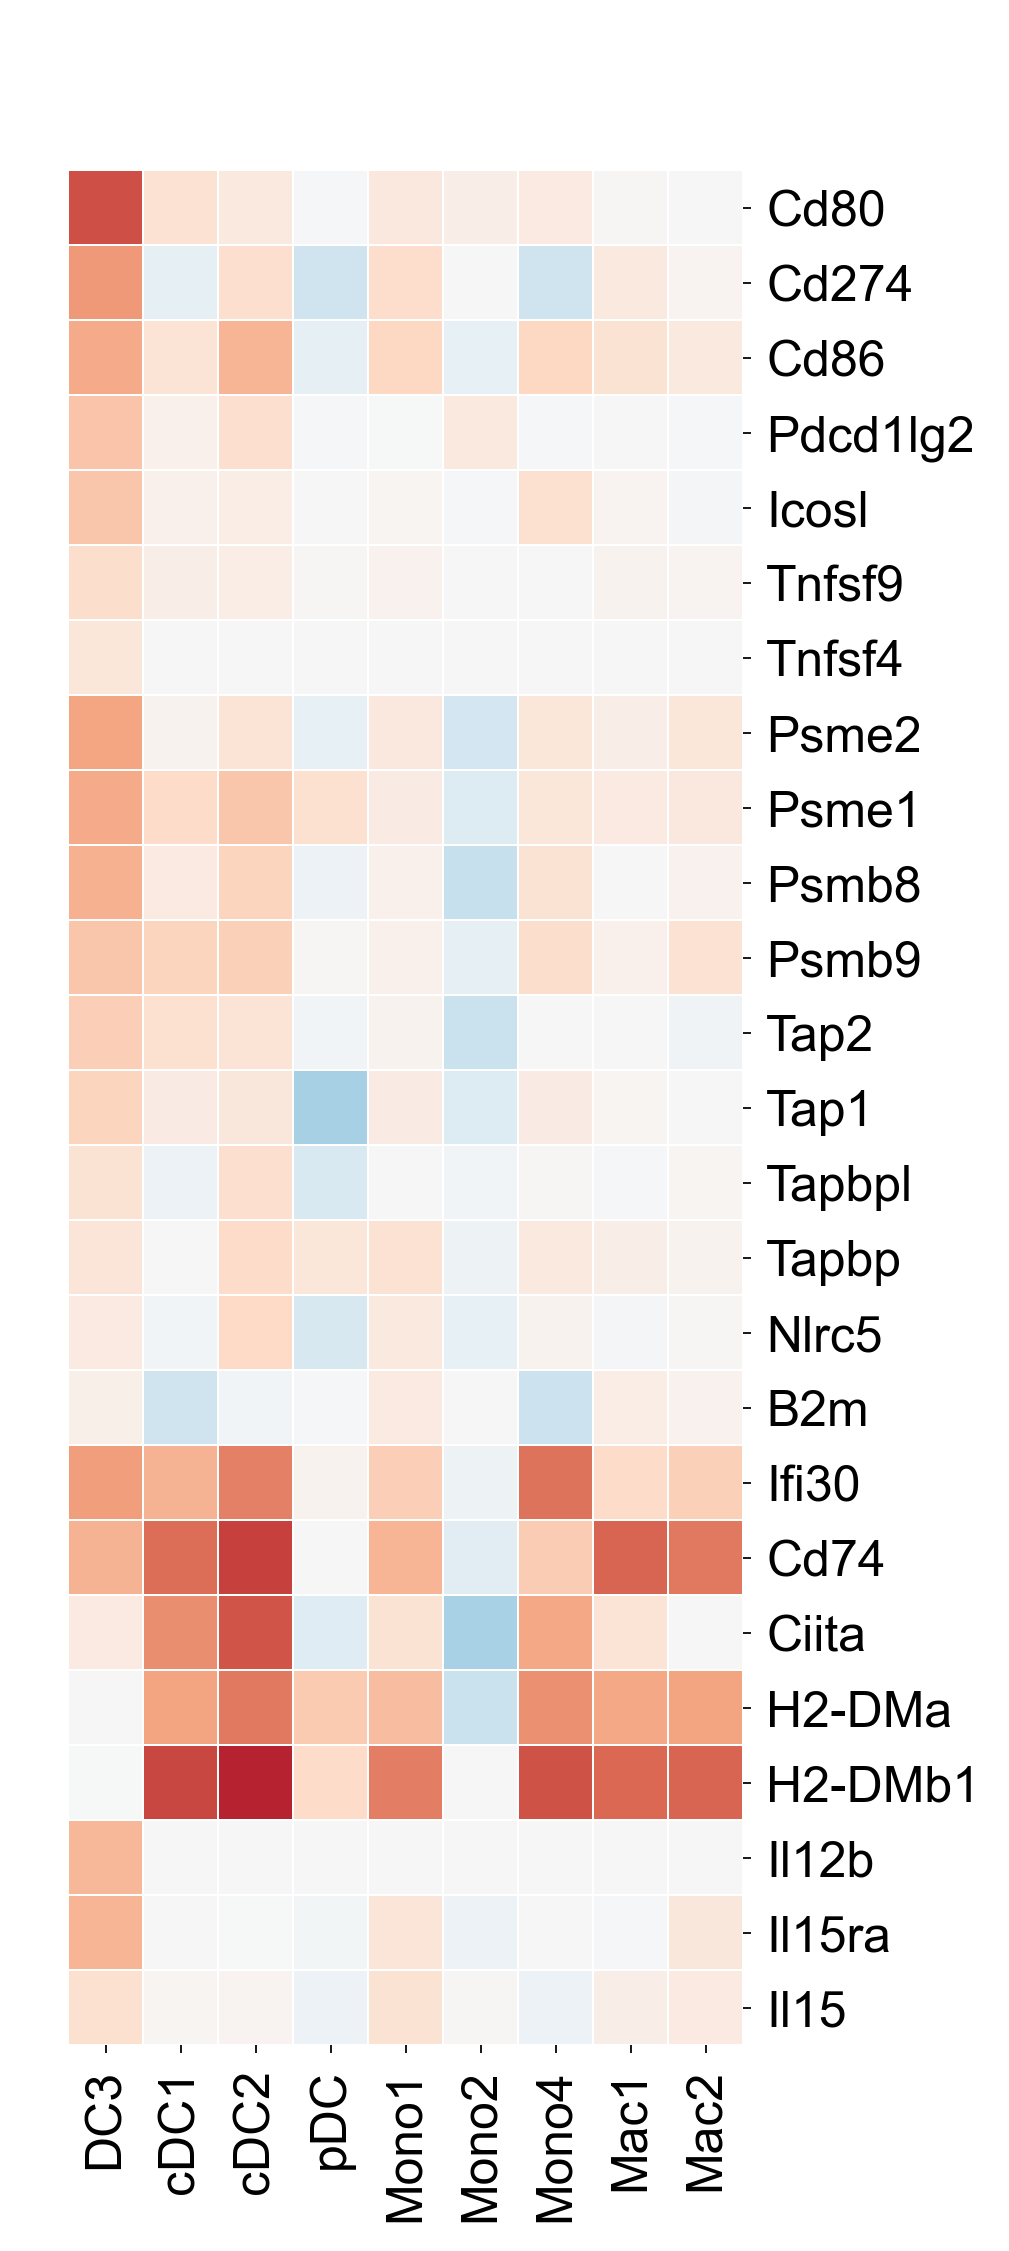

In [873]:
ax = mm.fixedWidthClusterMap(heat, row_cluster = False, col_cluster = False, cmap = plt.cm.get_cmap('RdBu_r'), 
                          linewidths = .25, cbar_pos = None, cellSizePixels=75, vmin = -3.5, vmax = 3.5)

mm.color_dataframe_cells(heat, vmin = -3.5, vmax = 3.5).to_excel('./outputs/gene_expression_heatmaps/heatmap_apc-b7-tnfsf-mhc-cytokine.xlsx')
ax.savefig('./outputs/gene_expression_heatmaps/heatmap_apc-b7-tnfsf-mhc-cytokine.pdf', dpi = 400)